### Notebook where an exemple use of the class CombCC is shown on a real data set (6 months of continuous data at the station BFO)

In [3]:
from libCombCC import *
import time


In [7]:
t0 = time.time()  # Start the timer to measure execution time
thresholds = [(1e-19, 5e-18),
            (1e-19, 3e-18),

            ]
freq_ranges = [(2e-3,7.5e-3),
               (1e-3,2e-3),
               ]

L = 2**14  # Length of the segments in samples (around two days of data with df = 0.1 Hz)
ell = 2**10  # Length of the sub-segments in samples (around 12 hours of data with df = 0.1 Hz)

st = read("Data/BFO_VHZ_2010-2010-6months.SAC")  # Read the stream data from the MiniSEED file
npts = st[0].stats.npts  # Get the number of points in the trace
xcc = CombCC(L=L, npts=npts ,ell=ell, fbands=freq_ranges, thresholds=thresholds)  # Initialize the CombCC class with the specified parameters
trace1 = st[0]  # Get the first trace from the stream
trace2 = st[0]  # Get the second trace from the stream

central_lag_list = InitialiseLagList(ell, L)  # Initialize the central lag list
central_lag_array_ij = getCentralLagArray(ell,L)  # Get the central lag array for the combs

spec1,selection_list_full1 = xcc.pre_proc(trace1)
spec2,selection_list_full2 = xcc.pre_proc(trace2)  # Pre-process the traces to get their spectra
Phi = xcc.ProcessData(spec1,spec2, selection_list_full1,selection_list_full2,central_lag_array_ij, central_lag_list)  # Process the data to get Phi
t1 = time.time()  # End the timer
print("Execution time: ", t1 - t0, " seconds")  # Print the execution time

Proportion of discarded segments for: BFO: 31.0 %
Proportion of discarded segments for: BFO: 31.0 %
Execution time:  2.7863059043884277  seconds


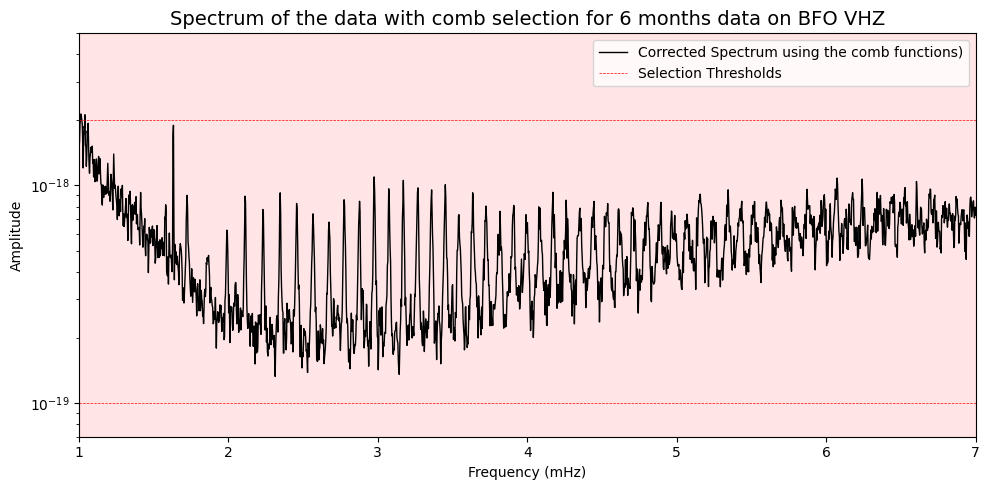

In [5]:
nfft = 2*L-1
spectrum = np.fft.rfft(Phi)
freqs= np.fft.rfftfreq(nfft, st[0].stats.delta)  # Frequencies corresponding to the FFT
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.semilogy(freqs[:L]*1e3, np.abs(spectrum[:L]), color='black', lw=1, label='Corrected Spectrum using the comb functions)')
ax.set_title('Spectrum of the data with comb selection for 6 months data on BFO VHZ', fontsize=14)
ax.set_xlabel('Frequency (mHz)')
ax.set_ylabel('Amplitude')
ax.set_xlim(1, 7)
ax.set_ylim(0.7e-19,5e-18)

# Plot the thresholds
ax.axhline(1e-19, color='red', linestyle='--', lw=0.5, label=f'Selection Thresholds')
ax.axhline(2e-18, color='red', linestyle='--', lw=0.5, )
ax.fill_betweenx(ax.get_ylim(), 1, 7, color='red', alpha=0.1)
ax.legend()
plt.tight_layout()

plt.savefig("Figures/BFO6MonthsRecovered.png", dpi=300)
plt.show()
